In [1]:
import pandas as pd
data = pd.read_excel('./Complete Journey.xlsx', sheet_name = 'one-hot')

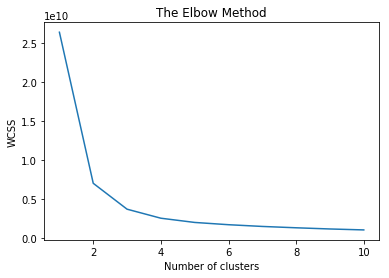

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



values = {'quantity': 0, 'sales value': 0
          , 'Price': 0, 'COUPON_DISCOUNT': 0,
         'num_national':0,'dh_coupon_redeemed':0,
         'value of dh coupon':0}

data = data.fillna(value=values)

x = data.iloc[:,1:40]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++')
data['Cluster'] = km.fit_predict(x)
data.to_csv('./Complete_Journey_Clustered_Cat.csv')

In [ ]:
x.to_csv('./one-hot.csv')

In [1]:
import pandas as pd
data = pd.read_excel('./Complete Journey.xlsx', sheet_name = 'original')
cluster0 = data[data['Cluster']==0]
cluster1 = data[data['Cluster']==1]
cluster2 = data[data['Cluster']==2]

cluster0_tran = []
for item in cluster0['household_key'].unique():
    tmp = cluster0[cluster0['household_key']==item]
    tmp_tran = []
    for index, row in tmp.iterrows():
        for i in range(row['quantity']):
            if row['category'] not in tmp_tran:
                tmp_tran.append(row['category'])
    cluster0_tran.append(tmp_tran)
cluster1_tran = []
for item in cluster1['household_key'].unique():
    tmp = cluster1[cluster1['household_key']==item]
    tmp_tran = []
    for index, row in tmp.iterrows():
        for i in range(row['quantity']):
            if row['category'] not in tmp_tran:
                tmp_tran.append(row['category'])
    cluster1_tran.append(tmp_tran)
    
cluster2_tran = []
for item in cluster2['household_key'].unique():
    tmp = cluster2[cluster2['household_key']==item]
    tmp_tran = []
    for index, row in tmp.iterrows():
        for i in range(row['quantity']):
            if row['category'] not in tmp_tran:
                tmp_tran.append(row['category'])
    cluster2_tran.append(tmp_tran)

In [4]:
from efficient_apriori import apriori

itemsets_2, rules_2 = apriori(cluster2_tran, min_support=0.05,  min_confidence=.2)

rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules_2)
with open('rules_cluster2.txt', 'a') as the_file:
    for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
        the_file.write(str(rule)+'\n')

In [3]:
from efficient_apriori import apriori

itemsets_1, rules_1 = apriori(cluster1_tran, min_support=0.05,  min_confidence=.2)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules_1)
with open('rules_cluster1.txt', 'a') as the_file:
    for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
        the_file.write(str(rule)+'\n')

In [7]:
from efficient_apriori import apriori
itemsets_0, rules_0 = apriori(cluster0_tran, min_support=0.5,  min_confidence=.2)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules_0)
with open('rules_cluster0.txt', 'a') as the_file:
    for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
        the_file.write(str(rule)+'\n')